<br><br>
<font size='6'><b>Fisher Discriminant Analysis</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

- Dimensionality reduction with label information (when the ultimate goal is classification/regression)


- PCA ignores label information even if it is available
    - Only chooses directions of maximum variance


- Fisher Discriminant Analysis (FDA) takes into account the label information
    - It’s also called Linear Discriminant Analysis (LDA)


- FDA/LDA projects data while preserving class separation
    - <font color='red'>Examples from same class are put closely together by the projection</font>
    - <font color='red'>Examples from different classes are placed far apart by the projection</font>

# 1. Projection onto line $\omega$

- Linear regression projects each data point
    - assume zero mean, otherwise $x \leftarrow x - \bar{x}$
    - $\omega_3 = 0$
$$ \hat{y} = \langle \omega,x\rangle = \omega^Tx = \omega_1x_1 + \omega_2x_2$$

- Dimension reduction

$$x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} \rightarrow \hat y \; (\text{scalar})$$


- Each data point $x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$ is projected onto $\omega$ (projected length on $\omega$ direction)


- For a given $\omega$, distribution of the projected points $\{ \hat y^{(1)}, \cdots, \hat y^{(m)} \}$ is specified.

 __Question: Which $\omega$ is better for classification?__

<br>
<img src="./image_files/projection.png" width = 700>
<br>

<table  width = "80%"> 
    <tr>
        <td width = "40%">
             $$\text{Class }C_0$$
        </td>
        <td width = "40%">
             $$\text{Class }C_1$$
        </td>
    </tr>
    <tr>
        <td width = "40%">
             sample mean $\mu_0$<br> sample variance $S_0$<br> 
             $\quad \mu _0 = \frac{1}{n_0} \sum\limits_{ x^{(i)} \in C_0}^{n_0}x^{(i)}$<br>
             $\quad S_0 = \frac{1}{n_0 - 1} \sum\limits_{ x^{(i)} \in C_0}^{n_0}\big( x^{(i)} - \mu_0 \big)\big( x^{(i)} - \mu_0 \big)^T$
        </td>
        <td width = "40%">
             sample mean $\mu_1$<br>sample variance $S_1$<br>
             $\quad \mu _1 = \frac{1}{n_1} \sum\limits_{ x^{(i)} \in C_1}^{n_1}x^{(i)}$<br>
             $\quad S_1 = \frac{1}{n_1 - 1} \sum\limits_{ x^{(i)} \in C_1}^{n_1}\big( x^{(i)}-\mu_1 \big)\big(x^{(i)}-\mu_1 \big)^T$
        </td>
    </tr>
    <tr>
        <td width = "40%">
             Projected space<br>
             $\quad E\,[ \hat y \mid x \in C_0 ] = \mu_0^T\omega$<br>
             $\quad \text{var}\,[\hat y \mid x \in C_0 ] = \omega^TS_0\omega$
        </td>
        <td width = "40%">
            Projected space<br>
            $\quad E\,[ \hat y \mid x \in C_1 ] = \mu_1^T\omega$<br>
            $\quad \text{var}\,[\hat y \mid x \in C_1 ] = \omega^TS_1\omega$
        </td>
    </tr>
</table>

- Find $\omega$ so that when projected onto $\omega$,

    - the classes are maximally separated (maximize distance between classes)
    
    - Each class is tight (minimize variance of each class)
    
    
$$\max_\omega \frac{(\text{seperation of projected means})^2}{\text{sum of within class variances}}$$

$$ \implies \max_\omega \frac {\big(\mu_0^T\omega - \mu_1^T\omega \big)^2}{n_0\omega^TS_0\omega + n_1\omega^TS_1\omega}$$

<br>
<img src="./image_files/01.png" width = 700>
<br>

$$\omega = \text{arg}\max_\omega \bigg\{ \frac{\big((\mu_0^T - \mu_1^T)\omega\big)^2}{n_0\omega^TS_0\omega + n_1\omega^TS_1\omega} \bigg \}$$
<br><br>
$$J(\omega) = \frac {\big((\mu_0^T - \mu_1^T)\omega\big)^2}{\omega^T(n_0S_0 + n_1S_1)\omega} = \frac {(m^T\omega)^2}{\omega^T\Sigma \omega}$$

$ $

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 25% style="border-style: hidden; border-collapse: collapse;">
             $ m \equiv \mu_0 - \mu_1$
        </td>
        <td width = 55%>

        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 25% style="border-style: hidden; border-collapse: collapse;">
             $ \Sigma \equiv n_0S_0 + n_1S_1 = R^TR$
        </td>
        <td width = 55%>
            We can always write $\Sigma$ like this, where $R$ is a "square root" matrix
        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 25% style="border-style: hidden; border-collapse: collapse;">
             $u \equiv R\omega \rightarrow \omega = R^{-1}u$
        </td>
        <td width = 55%>
            Using $R$, change the coordinate systems from $\omega$ to $u$
        </td>
    </tr>
</table>

<br>

$$J(u) = \frac {\big( m^TR^{-1}u\big)^2}{\omega^TR^TR\omega} = \frac {\bigg( \big(R^{-T}m \big)^Tu\bigg)^2}{u^Tu}= 
\bigg( \left(R^{-T}m \right)^T  \frac{u}{\parallel u \parallel} \bigg)^2$$

<br>
$$J(u) = \bigg( \left(R^{(-T)}m \right)^T  \frac{u}{\lVert u \rVert} \bigg)^2 \; \text{is maximum when} \; u = a\,R^{-T}m$$


- Why? 
    - Dot product of a unit vector and another vector is maximum when the two have the same direction.

<br>
$$\begin{align*} 
u &= aR^{-T}m = aR^{-T}(\mu_0 - \mu_1)\\
 \omega &= R^{-1}u = aR^{-1}R^{-T}(\mu_0 - \mu_1) = a\big(R^TR\big)^{-1}(\mu_0 - \mu_1) = a\Sigma^{-1}(\mu_0 - \mu_1) \\ \\
\therefore \; \omega &= a(n_0S_0 + n_1S_1)^{-1}(\mu_0 - \mu_1) 
\end{align*}$$

## Training data set generationm

In [1]:
n0 = 200;
n1 = 200;

mu = [0 0];
sigma = [0.9 -0.4;
        -0.4 0.3];
        
x0 = mvnrnd(mu,sigma,n0)' + 2.5*ones(2,n0);         % data in class 0
x1 = mvnrnd(mu,sigma,n1)' + 1*ones(2,n1);           % data in class 1

In [2]:
mu0 = mean(x0,2);
mu1 = mean(x1,2);

S0 = 1/(n0-1)*(x0-repmat(mu0,1,n0))*(x0-repmat(mu0,1,n0))';
S1 = 1/(n1-1)*(x1-repmat(mu1,1,n1))*(x1-repmat(mu1,1,n1))';

w = inv(n0*S0+n1*S1)*(mu0-mu1);

## Projection line and histogram

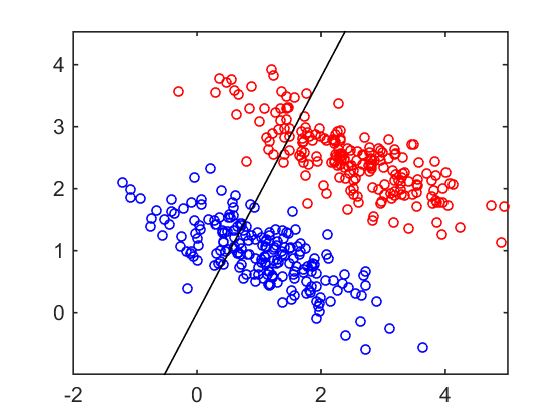

In [5]:
figure(1),  clf
scatter(x0(1,:),x0(2,:),20,'ro');    hold on;
scatter(x1(1,:),x1(2,:),20,'bo');

t = -2:0.1:6;
ln = (w./norm(w))*t;
plot(ln(1,:),ln(2,:),'k');  hold off;
box on, axis equal
xlim([-2 5])

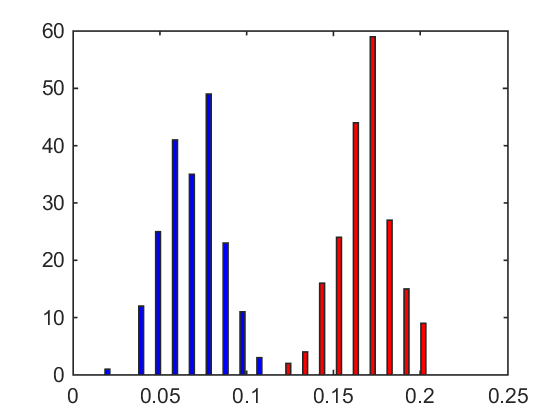

In [6]:
figure(2)
y1 = x0'*w;
y2 = x1'*w;
hist([y1 y2],20)
h = findobj(gca,'type','patch');
h(1).FaceColor = 'b';
h(2).FaceColor = 'r';

## different $\omega$ (x axis)

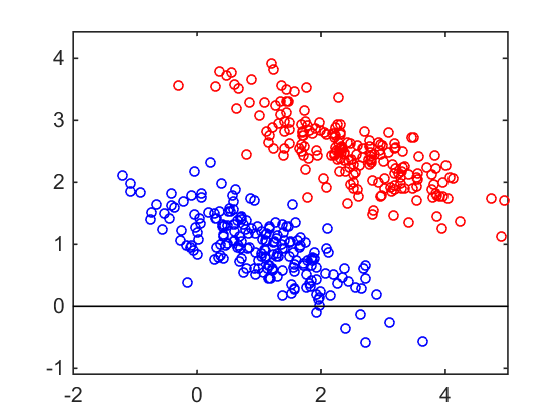

In [9]:
w = [10 0]';

figure(3),  clf
scatter(x0(1,:),x0(2,:),20,'ro');    hold on;
scatter(x1(1,:),x1(2,:),20,'bo');

t = -2:0.1:6;
ln = (w./norm(w))*t;
plot(ln(1,:),ln(2,:),'k');  hold off;
box on, axis equal
xlim([-2 5])

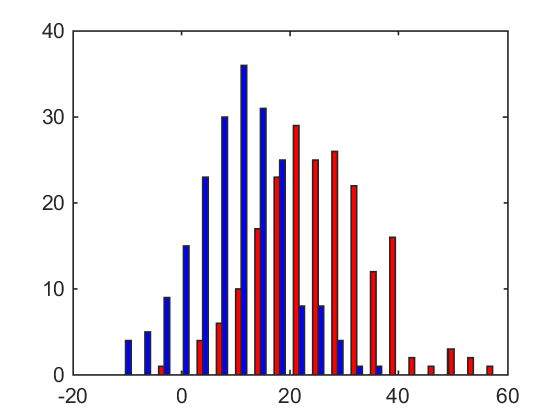

In [10]:
figure(4)
y1 = x0'*w;
y2 = x1'*w;
hist([y1 y2],20);
h = findobj(gca,'type','patch');
h(1).FaceColor = 'b';
h(2).FaceColor = 'r';

## different $\omega$ (y axis)

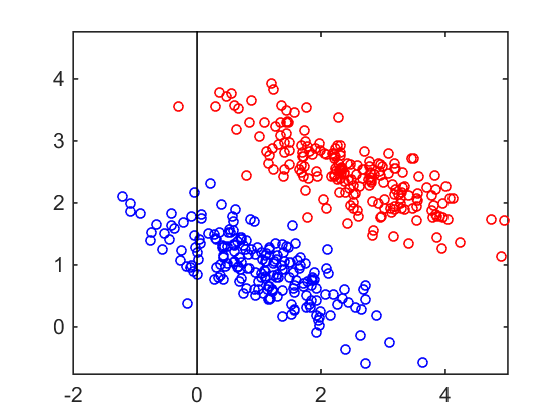

In [12]:
w = [0 10]';

figure(5),  clf
scatter(x0(1,:),x0(2,:),20,'ro');    hold on;
scatter(x1(1,:),x1(2,:),20,'bo');

t = -2:0.1:6;
ln = (w./norm(w))*t;
plot(ln(1,:),ln(2,:),'k');  hold off;
box on, axis equal
xlim([-2 5])

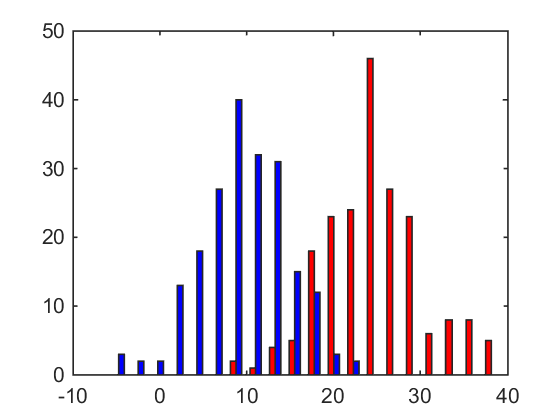

In [13]:
figure(6)
y1 = x0'*w;
y2 = x1'*w;
hist([y1 y2],20);
h = findobj(gca,'type','patch');
h(1).FaceColor = 'b';
h(2).FaceColor = 'r';

# Example 
Source: Teknomo, Kardi (2005), Discriminant Analysis Tutorial, http://people.revoledu.com/kardi/tutorial/LDA

Factory ABC produces very expensive and high quality chip rings that their qualities are measured in terms of curvature and diameter. Result of qualit control by experts is given in the table below

|Curvature|Diameter|Quality Control Result|
|---|---|---|
|2.95|6.63| Go |
|2.53|7.79| Go |
|3.57|5.65| Go|
|3.16|5.47| Go|
|2.58|4.46| NoGo|
|2.16|6.22| NoGo|
|3.27|3.52| NoGo|

As a consultant to the factory, you get a task to set up the criteria for automatic quality control. Then the manager of the factory also wants to test your criteria upon new type of chip rings that even the human experts are argued to each other. The new chip rings have curvature 2.81 and diamter 5.46.

Can you solve ths problem by emplying LDA?


$$x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}, \qquad X = \begin{bmatrix} x_1 & \cdots\\ x_2 & \cdots\end{bmatrix}$$

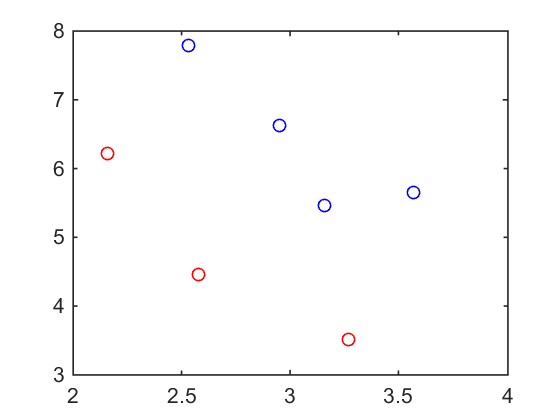

In [30]:
clear all
X0 = [2.95 2.53 3.57 3.16;
      6.63 7.79 5.65 5.47];
X1 = [2.58 2.16 3.27;
      4.46 6.22 3.52];
      
n0 = length(X0);
n1 = length(X1);

plot(X0(1,:),X0(2,:),'ob',X1(1,:),X1(2,:),'or')

In [31]:
gmu = mean([X0 X1],2);

X0 = X0 - repmat(gmu,1,n0);
X1 = X1 - repmat(gmu,1,n1);

mu0 = mean(X0,2);
mu1 = mean(X1,2);

S0 = 1/(n0-1)*(X0-repmat(mu0,1,n0))*(X0-repmat(mu0,1,n0))';
S1 = 1/(n1-1)*(X1-repmat(mu1,1,n1))*(X1-repmat(mu1,1,n1))';

w = inv(n0*S0+n1*S1)*(mu0-mu1)

w =

    4.1448
    1.7262

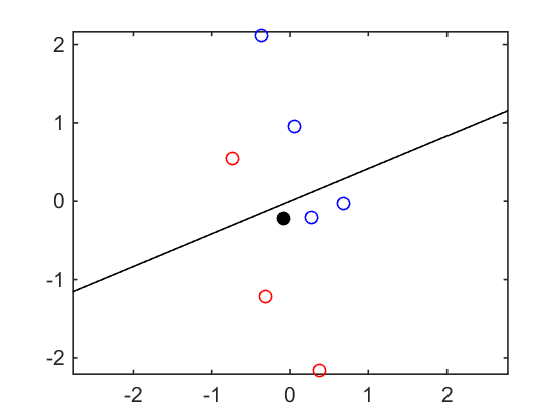

In [32]:
figure(1),  clf
plot(X0(1,:),X0(2,:),'ob',X1(1,:),X1(2,:),'or'), hold on

Xnew = [2.81 5.46]';
Xnew = Xnew - gmu;

plot(Xnew(1),Xnew(2),'ok','markerfacecolor','k')

t = -3:0.1:3;
ln = (w./norm(w))*t;
plot(ln(1,:),ln(2,:),'k');  hold off;
box on, axis equal
%xlim([-3 3])

In [33]:
Znew = (w'/norm(w))*Xnew

Znew =

   -0.1560

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>